In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from numpy import linalg as LA

In [128]:
import lime

In [124]:
def plot_explanations(sample_idx, save = False, mode = 'normal'):
    explain_file = 'results/explanation/ulime_explain_' + str(sample_idx) + '_.pickle'
    with open(explain_file, 'rb') as file:
        load_data = pickle.load(file)
    num_figs = len(load_data)-1
    plot_size = 10
    fig, axs = plt.subplots(1,num_figs, figsize=(plot_size, plot_size))
    for i in range(num_figs):
        if i == 0:
            axs[i].imshow(load_data[i+1], cmap=plt.get_cmap('Greys'))
        else:
            if mode == 'normal':
                axs[i].imshow(load_data[i+1], cmap=plt.get_cmap('bwr'))
            else:
                axs[i].imshow(np.abs(load_data[i+1]), cmap=plt.get_cmap('binary'))
        axs[i].axis('off')

In [102]:
def get_explanation_distance(sample_idx):
    explain_file = 'results/explanation/ulime_explain_' + str(sample_idx) + '_.pickle'
    with open(explain_file, 'rb') as file:
        load_data = pickle.load(file)
    ulime = load_data[1]
    ulime_nonembedded = load_data[2]
    lime_noseg = load_data[3]
    lime = load_data[4]
    
    ulime_l2 = LA.norm(ulime - lime)
    ulime_l1 = LA.norm(ulime - lime, 1)
    ulime_nonembedded_l2 = LA.norm(ulime_nonembedded - lime)
    ulime_nonembedded_l1 = LA.norm(ulime_nonembedded - lime, 1)
    lime_noseg_l2 = LA.norm(lime_noseg - lime)
    lime_noseg_l1 = LA.norm(lime_noseg - lime, 1)

    return ulime_l2, ulime_l1, ulime_nonembedded_l2, ulime_nonembedded_l1, lime_noseg_l2, lime_noseg_l1

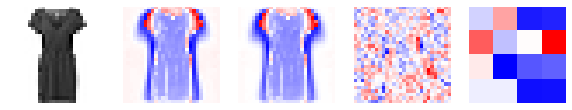

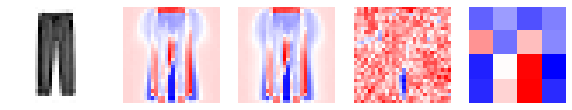

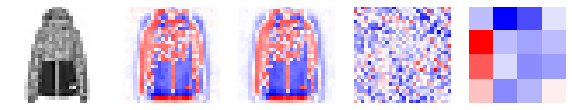

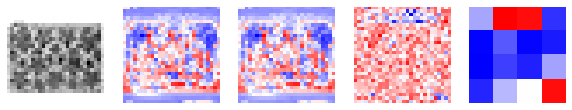

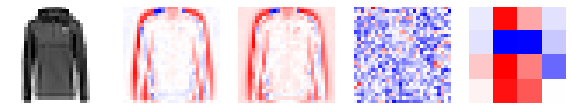

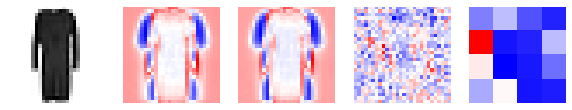

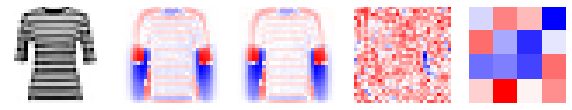

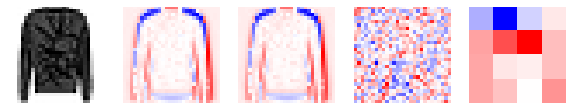

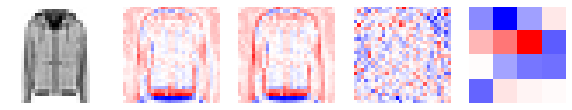

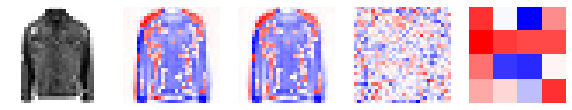

In [126]:
for sample_idx in range(20,30):
    plot_explanations(sample_idx, mode = 'normal')